# Function Spec
We need a python function that when given a list will return a sequence of the neighboring pairs.

E.g.

    Input: [1,3,5,7]
    Output: [(3,1),(5,3),(7,5)]
    
Note: Definition of **neighboring pair**: two numbers are *physically*  neightbors.

Assumption: 
1. The numbers are integer.
2. The numbers in the output tuple pairs are in reversed order.


## Setup

In [24]:
import sys
import gc

from itertools import tee, islice
from timeit import default_timer as timer
from memory_profiler import memory_usage

import numpy as np
from numpy.random import randint

import seaborn as sns
import pylab as pl
from matplotlib import pyplot as plt

np.random.seed(42)
sns.set()

print("Python version: " + sys.version)

%load_ext memory_profiler

Python version: 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


## Task A - Function Implementation

####  Implementation: Easy to read

In [2]:
def get_neighboring_pair_easy_to_read(nums):
    if not isinstance(nums, list):
        raise TypeError
    if len(nums) == 0 or len(nums) == 1:
        return [] 
    res = []
    ptr1, ptr2 = 0, 1
    while ptr2 < len(nums):
        res.append((nums[ptr2], nums[ptr1]))
        ptr1, ptr2 = ptr1 + 1, ptr2 + 1
    return res

####  Implementation: Fewest lines-of-code

In [3]:
def get_neighboring_pair_fewest_lines(nums):
    if not isinstance(nums, list):
        raise TypeError
    if len(nums) == 0 or len(nums) == 1:
        return [] 
    return [(nums[i], nums[i - 1]) for i in list(range(1, len(nums)))]

####  Implementation: Using the least peak memory

In [4]:
def get_neighboring_pair_iter(nums):
    if not isinstance(nums, list):
        raise TypeError
    if len(nums) == 0 or len(nums) == 1:
        return []
    iter1, iter2 = tee(nums)
    next(iter1, None)
    return list(zip(iter1, iter2))

In [5]:
test_data = [1,3,5,7]
print(get_neighboring_pair_iter(test_data))

[(3, 1), (5, 3), (7, 5)]


####  Implementation: Using zip & list slicing

In [6]:
def get_neighboring_pair_zip(nums):
    if not isinstance(nums, list):
        raise TypeError
    if len(nums) == 0 or len(nums) == 1:
        return []
    return list(zip(nums[1:], nums))

## Task B - Unit Tests

In [7]:
import unittest

class TestFooBase:
    def test_input_empty(self):
        self.assertEqual(self.impl([]), [])

    def test_input_single_number(self):
        self.assertEqual(self.impl([1]), [])
        
    def test_sample_case_1(self):
        self.assertEqual(self.impl([1,3,5,7]), [(3,1),(5,3),(7,5)])

    def test_sample_case_2(self):
        self.assertEqual(self.impl([3,1,7,5]), [(1,3),(7,1),(5,7)])
        
    def test_sample_case_3(self):
        self.assertEqual(self.impl([1,"3",5,7]), [("3",1),(5,"3"),(7,5)])
    
    def test_input_not_list(self):
        with self.assertRaises(TypeError):
            self.impl("")
        
    def test_list_too_large(self):
        with self.assertRaises(MemoryError):
            self.impl([1]*(sys.maxsize))

class TestGetNeighboringPairEasyToRead(unittest.TestCase, TestFooBase):
    impl = staticmethod(get_neighboring_pair_easy_to_read)
    
class TestGetNeighboringPairFewestLines(unittest.TestCase, TestFooBase):
    impl = staticmethod(get_neighboring_pair_easy_to_read)    
    
class TestGetNeighboringPairIter(unittest.TestCase, TestFooBase):
    impl = staticmethod(get_neighboring_pair_iter)
    
class TestGetNeighboringPairZip(unittest.TestCase, TestFooBase):
    impl = staticmethod(get_neighboring_pair_zip)
    
    
unittest.main(argv=[''], verbosity=2, exit=False)

test_input_empty (__main__.TestGetNeighboringPairEasyToRead) ... ok
test_input_not_list (__main__.TestGetNeighboringPairEasyToRead) ... ok
test_input_single_number (__main__.TestGetNeighboringPairEasyToRead) ... ok
test_list_too_large (__main__.TestGetNeighboringPairEasyToRead) ... ok
test_sample_case_1 (__main__.TestGetNeighboringPairEasyToRead) ... ok
test_sample_case_2 (__main__.TestGetNeighboringPairEasyToRead) ... ok
test_sample_case_3 (__main__.TestGetNeighboringPairEasyToRead) ... ok
test_input_empty (__main__.TestGetNeighboringPairFewestLines) ... ok
test_input_not_list (__main__.TestGetNeighboringPairFewestLines) ... ok
test_input_single_number (__main__.TestGetNeighboringPairFewestLines) ... ok
test_list_too_large (__main__.TestGetNeighboringPairFewestLines) ... ok
test_sample_case_1 (__main__.TestGetNeighboringPairFewestLines) ... ok
test_sample_case_2 (__main__.TestGetNeighboringPairFewestLines) ... ok
test_sample_case_3 (__main__.TestGetNeighboringPairFewestLines) ... ok
t

## Task C - Performance Testing

#### Time complexity comparision

In [8]:
def generate_random_data_in_order(test_data_order):
    max_int = pow(10,9)
    min_int = -pow(10,9)
    res = []
    for order in test_data_order:
        res.append(list(randint(min_int, max_int, pow(10, order))))
                   
    return res

In [9]:
def measure_func_elasped_time(total_test_data, func):
    res = []
    for test_data in total_test_data:
        start = timer()
        func(test_data)
        end = timer()
        res.append(end - start)
    return res

In [10]:
test_data_order = [1,2,3,4,5,6,7]
total_test_data = generate_random_data_in_order(test_data_order)
print(len(total_test_data))
test_data_number = [pow(10, order) for order in test_data_order]

7


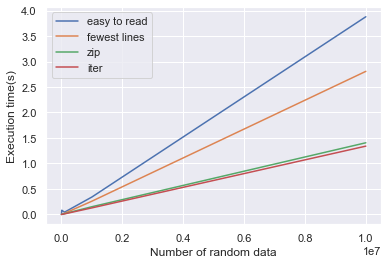

In [11]:
fig = plt.figure()
plt.xlabel("Number of random data")
plt.ylabel("Execution time(s)")

plt.plot(test_data_number, measure_func_elasped_time(total_test_data, get_neighboring_pair_easy_to_read), label="easy to read")
plt.plot(test_data_number, measure_func_elasped_time(total_test_data, get_neighboring_pair_fewest_lines), label="fewest lines")
plt.plot(test_data_number, measure_func_elasped_time(total_test_data, get_neighboring_pair_zip), label="zip")
plt.plot(test_data_number, measure_func_elasped_time(total_test_data, get_neighboring_pair_iter), label="iter")

plt.legend(loc="upper left")

#### Space complexity comparision

In [12]:
def measure_func_peak_memory_usage(total_test_data, func):
    res = []
    for test_data in total_test_data:
        res.append(memory_usage((func, (test_data,), {}), max_usage=True, interval=.005))
    return res

In [13]:
"""
%%file mprun_func_library.py
def get_neighboring_pair_easy_to_read(nums):
    if not isinstance(nums, list):
        raise TypeError
    if len(nums) == 0 or len(nums) == 1:
        return [] 
    res = []
    ptr1, ptr2 = 0, 1
    while ptr2 < len(nums):
        res.append((nums[ptr2], nums[ptr1]))
        ptr1, ptr2 = ptr1 + 1, ptr2 + 1
    return res

def get_neighboring_pair_fewest_lines(nums):
    if not isinstance(nums, list):
        raise TypeError
    if len(nums) == 0 or len(nums) == 1:
        return [] 
    return [(nums[i], nums[i - 1]) for i in range(1, len(nums))]

def get_neighboring_pair_iter(nums):
    if not isinstance(nums, list):
        raise TypeError
    if len(nums) == 0 or len(nums) == 1:
        return []
    iter1, iter2 = tee(nums)
    next(iter1, None)
    return list(zip(iter1, iter2))
"""

'\n%%file mprun_func_library.py\ndef get_neighboring_pair_easy_to_read(nums):\n    if not isinstance(nums, list):\n        raise TypeError\n    if len(nums) == 0 or len(nums) == 1:\n        return [] \n    res = []\n    ptr1, ptr2 = 0, 1\n    while ptr2 < len(nums):\n        res.append((nums[ptr2], nums[ptr1]))\n        ptr1, ptr2 = ptr1 + 1, ptr2 + 1\n    return res\n\ndef get_neighboring_pair_fewest_lines(nums):\n    if not isinstance(nums, list):\n        raise TypeError\n    if len(nums) == 0 or len(nums) == 1:\n        return [] \n    return [(nums[i], nums[i - 1]) for i in range(1, len(nums))]\n\ndef get_neighboring_pair_iter(nums):\n    if not isinstance(nums, list):\n        raise TypeError\n    if len(nums) == 0 or len(nums) == 1:\n        return []\n    iter1, iter2 = tee(nums)\n    next(iter1, None)\n    return list(zip(iter1, iter2))\n'

In [14]:
# from mprun_func_library import get_neighboring_pair_easy_to_read, get_neighboring_pair_fewest_lines, get_neighboring_pair_iter

In [15]:
# %mprun -f get_neighboring_pair_easy_to_read get_neighboring_pair_easy_to_read(total_test_data[-2])

In [16]:
# %mprun -f get_neighboring_pair_fewest_lines get_neighboring_pair_fewest_lines(total_test_data[-2])

In [17]:
# %mprun -f get_neighboring_pair_iter get_neighboring_pair_iter(total_test_data[-1])

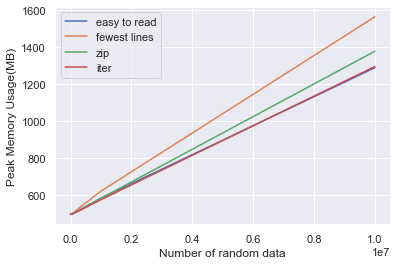

In [18]:
fig = plt.figure()
plt.xlabel("Number of random data")
plt.ylabel("Peak Memory Usage(MB)")

plt.plot(test_data_number, measure_func_peak_memory_usage(total_test_data, get_neighboring_pair_easy_to_read), label="easy to read")
plt.plot(test_data_number, measure_func_peak_memory_usage(total_test_data, get_neighboring_pair_fewest_lines), label="fewest lines")
plt.plot(test_data_number, measure_func_peak_memory_usage(total_test_data, get_neighboring_pair_zip), label="zip")
plt.plot(test_data_number, measure_func_peak_memory_usage(total_test_data, get_neighboring_pair_iter), label="iter")

plt.legend(loc="upper left")

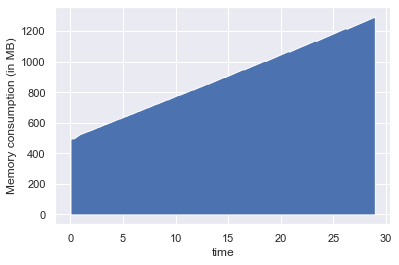

In [19]:
mem_easy_to_read = memory_usage((get_neighboring_pair_easy_to_read, (total_test_data[-1],), {}), interval=.005)
x = np.linspace(0, len(mem_easy_to_read) * .05, len(mem_easy_to_read))
p = pl.fill_between(x, mem_easy_to_read)
pl.xlabel('time')
pl.ylabel('Memory consumption (in MB)')
pl.show()

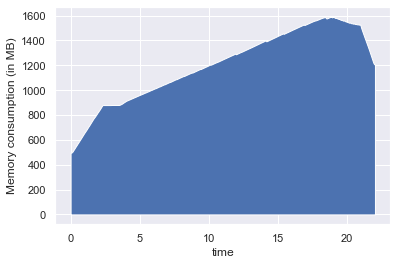

In [20]:
mem_fewest_lines = memory_usage((get_neighboring_pair_fewest_lines, (total_test_data[-1],), {}), interval=.005)
x = np.linspace(0, len(mem_fewest_lines) * .05, len(mem_fewest_lines))
p = pl.fill_between(x, mem_fewest_lines)
pl.xlabel('time')
pl.ylabel('Memory consumption (in MB)')
pl.show()

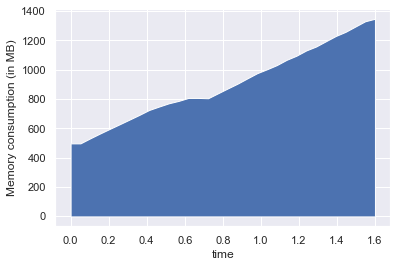

In [21]:
mem_iter = memory_usage((get_neighboring_pair_iter, (total_test_data[-1],), {}), interval=.05)
x = np.linspace(0, len(mem_iter) * .05, len(mem_iter))
p = pl.fill_between(x, mem_iter)
pl.xlabel('time')
pl.ylabel('Memory consumption (in MB)')
pl.show()

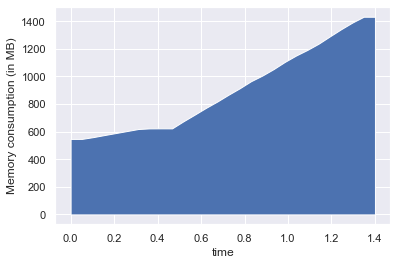

In [22]:
mem_zip = memory_usage((get_neighboring_pair_zip, (total_test_data[-1],), {}), interval=.05)
x = np.linspace(0, len(mem_zip) * .05, len(mem_zip))
p = pl.fill_between(x, mem_zip)
pl.xlabel('time')
pl.ylabel('Memory consumption (in MB)')
pl.show()

## Task D - Discussion

#### Performance
* Run-time: 
    * The _get_neighboring_pair_iter_ implementation has the best performance because it uses two Python iterator to access neighboring pairs. In addition, the iteration process is conducted in **low-level C code**, which is much faster compared with for loop in Python. 
    * The run-time of _get_neighboring_pair_zip_ is slight higher than _get_neighboring_pair_iter_, because the list slicing operation may induce addtion process time. 
    * _get_neighboring_pair_fewest_lines_ have slower execution time compared with the previous two implementations, even though the iteration also occurs in C. It would be because **list comprehension** needs to reserve the memory for the whole list.
    * _get_neighboring_pair_easy_to_read_ is much slower compared with other three implementations because it not only performs the iteration in Python but also needs to perform **append** operation every iteration, which induce additional _looked up_ and _loaded_ and as a function every iteration.


* Peak Memory usage:
    *  _get_neighboring_pair_easy_to_read_ and _get_neighboring_pair_iter_ have almost the same and least peak memory, becuase they both their memory usage rise directly related to the number of iterations.
    * As mentioned above, _get_neighboring_pair_zip_ has slightly higher peak memory usage because it performs the list slicing operation which copy almost all the reference of elements in the input list.
    * The memory usage of _get_neighboring_pair_fewest_lines_ is the highest. The Python version used in this task is 3. To mimic the **range(len(nums))** behavior in Python 2, which actually creates a list rather than an iterator in Python 3, our implementation uses **list(range(nums))** to ensure a full list is generated. It also allocates the result list in advance. Therefore, this implementation takes the most memory usage. 

#### Tradeoff 
* Development / Prototype Phase: The most important thing for a function prototyping would be the readability and easy to debug. The run-time efficiency is not the major concern during this phase. I would choose _get_neighboring_pair_easy_to_read_ because it is the simplest to read and understand.
* Production Phase: During the production phase, the run-time efficiency becomes the most important consideration because the run-time of a program directly affects the cost of downstream application. The _get_neighboring_pair_iter_ would be the best choice in this phase by both considering the run-time and memory usage. 